In [1]:
import theano
import numpy as np
import sys

%matplotlib inline
import matplotlib.pyplot as plt

We will walk through the basic functions of loading up a model, obtaining the latent variables for sequences in the dataset, and generating sequences from latent variables. Since model training is computationally expensive and is best suited for a GPU-enabled compute cluster, executables for the SVI and MLE version of the code are available.

# Downloading pretrained parameters

Please first download the pretrained parameters in the "Downloading pretrained parameters.ipynb" notebook. 

# Loading the model

In [2]:
sys.path.insert(0, "../DeepSequence")

import model
import helper
import train

First let's load up a model. We don't have to calculate sequence weights here because we are not training a model and this can be slow on the CPU. 

In [13]:
data_params = {"dataset":"BLAT_ECOLX"}

data_helper = helper.DataHelper(
                dataset=data_params["dataset"],
                working_dir=".",
                calc_weights=False
                )

model_params = {
        "batch_size"        :   100,
        "encode_dim_zero"   :   1500,
        "encode_dim_one"    :   1500,
        "decode_dim_zero"   :   100,
        "decode_dim_one"    :   500,
        "n_patterns"        :   4,
        "n_latent"          :   30,
        "logit_p"           :   0.001,
        "sparsity"          :   "logit",
        "encode_nonlin"     :   "relu",
        "decode_nonlin"     :   "relu",
        "final_decode_nonlin":  "sigmoid",
        "output_bias"       :   True,
        "final_pwm_scale"   :   True,
        "conv_pat"          :   True,
        "d_c_size"          :   40
        }

vae_model   = model.VariationalAutoencoder(data_helper,
    batch_size              =   model_params["batch_size"],
    encoder_architecture    =   [model_params["encode_dim_zero"],
                                model_params["encode_dim_one"]],
    decoder_architecture    =   [model_params["decode_dim_zero"],
                                model_params["decode_dim_one"]],
    n_latent                =   model_params["n_latent"],
    n_patterns              =   model_params["n_patterns"],
    convolve_patterns       =   model_params["conv_pat"],
    conv_decoder_size       =   model_params["d_c_size"],
    logit_p                 =   model_params["logit_p"],
    sparsity                =   model_params["sparsity"],
    encode_nonlinearity_type       =   model_params["encode_nonlin"],
    decode_nonlinearity_type       =   model_params["decode_nonlin"],
    final_decode_nonlinearity      =   model_params["final_decode_nonlin"],
    output_bias             =   model_params["output_bias"],
    final_pwm_scale         =   model_params["final_pwm_scale"],
    working_dir             =   ".")

print ("Model built")

sequence ['A', 'T', 'L', 'R', 'A', 'L', 'E', 'Q', 'D', 'A', 'G', 'A', 'Q', 'V', 'S', 'V', 'H', 'V', 'V', 'D', 'L', 'D', 'N', 'H', 'V', 'H', 'V', 'S', 'G', 'D', 'D', 'H', 'V', 'T', 'M', 'P', 'V', 'A', 'G', 'L', 'G', 'V', 'V', 'P', 'L', 'L', 'I', 'E', 'V', 'A', 'A', 'A', 'F', 'E', 'A', 'G', 'A', 'L', 'D', 'P', 'L', 'E', 'I', 'V', 'E', 'R', 'S', 'A', 'V', 'D', 'S', 'V', 'S', 'T', 'S', 'G', 'L', 'W', 'R', 'H', 'L', 'H', 'A', 'P', 'A', 'L', 'P', 'L', 'E', 'D', 'L', 'A', 'V', 'L', 'A', 'A', 'T', 'A', 'G', 'D', 'P', 'I', 'A', 'V', 'N', 'A', 'L', 'L', 'H', 'R', 'V', '-', 'G', 'H', 'D', 'R', 'V', 'R', 'R', 'R', 'I', 'E', 'D', 'L', 'G', 'L', 'R', 'R', 'T', 'A', 'L', 'L', 'D', 'R', 'F', 'R', 'D', 'E', 'R', 'G', 'P', 'D', 'D', 'A', 'P', 'Q', 'V', 'A', 'V', 'G', 'S', 'A', 'R', 'E', 'F', 'A', 'G', 'L', 'F', 'S', 'A', 'L', 'V', 'N', 'S', 'Q', 'V', 'V', 'D', 'A', 'P', 'V', 'S', 'A', 'Q', 'V', 'A', 'E', 'W', 'L', 'S', 'L', 'N', 'Q', 'D', '-', 'L', 'S', 'L', 'V', 'A', 'A', 'S', 'T', 'G', 'H', 'G', 'L', 

Load up the parameters of a pretrained model in the 'params' folder.

In [15]:
file_prefix = "BLAT_ECOLX"

vae_model.load_parameters(file_prefix=file_prefix)

print ("Parameters loaded")

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd0 in position 0: ordinal not in range(128)

Print the name, location, and sequence of the focus sequence of the alignment:

In [5]:
print (data_helper.focus_seq_name)
print (str(data_helper.focus_start_loc)+"-"+str(data_helper.focus_stop_loc))
print (data_helper.focus_seq)

>BLAT_ECOLX/24-286
24-286
hpetlVKVKDAEDQLGARVGYIELDLNSGKILeSFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGErGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIkhw


However, we remove lowercase letters from the focus sequences before training because columns of the alignment in those positions have little amino acid coverage in them:

In [7]:
print ("".join(data_helper.focus_seq_trimmed))

VKVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGEGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLI


# Model functions

Let's get the latent variables for that sequence of the model. This model has a 30 dimensional latent representation whose prior is a diagonal Gaussian.

In [8]:
focus_seq_one_hot = np.expand_dims(data_helper.one_hot_3D(data_helper.focus_seq_trimmed),axis=0)
mu_blat, log_sigma_blat = vae_model.recognize(focus_seq_one_hot)
print ("mu:")
print (mu_blat[0])
print ("\nlog sigma:")
print (log_sigma_blat[0])

mu:
[ 0.34938802 -0.13276478 -0.00635905 -0.0519855  -0.03323791  0.02068262
 -0.35835532  0.37571222 -0.31491978  0.2216208  -0.36170241  0.51862729
  0.52036539 -0.23304972  0.19518882  0.21947976  0.32090208  0.49596854
  0.2084736   0.43719074  0.16998474  0.63181091  0.15745053 -0.14569474
  0.60805297 -0.46293343 -0.43630477 -0.05935098 -0.01780249 -0.14023283]

log sigma:
[-4.66593918 -4.63269746 -5.17962881 -5.2628855  -5.34027153 -4.86437884
 -5.08196748 -5.40233033 -5.50361482 -4.78762112 -5.22542082 -5.53464046
 -4.8920119  -5.01001952 -4.92974687 -5.35288695 -5.19385034 -4.89988563
 -6.06612677 -5.44057619 -4.78473196 -5.25366396 -5.12093702 -4.92797392
 -4.85533433 -4.82210096 -4.56625006 -5.09157662 -5.65296305 -4.89292555]


We can also sample from this model:

In [9]:
z_blat = vae_model.encode(focus_seq_one_hot)
print ("z:")
print (z_blat[0])

z:
[ 0.36120883 -0.13799803 -0.00694649 -0.04851508 -0.03663313  0.02836846
 -0.35790542  0.37271531 -0.31110398  0.22044417 -0.35740831  0.51964504
  0.53028492 -0.2253781   0.19448775  0.21704803  0.32431517  0.49585889
  0.20385944  0.4424637   0.16340249  0.63282967  0.16067538 -0.14826396
  0.60354168 -0.44843225 -0.42904103 -0.06795993 -0.01822602 -0.13191983]


And then generate a sample distribution around that sequence via the sampled latent variable.

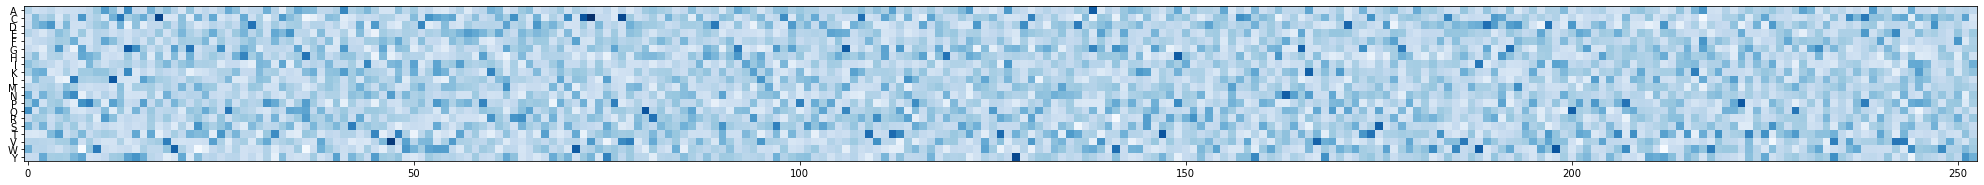

In [10]:
seq_reconstruct = vae_model.decode(z_blat)
plt.figure(figsize=(35,10))
plt.imshow(seq_reconstruct[0].T,cmap=plt.get_cmap("Blues"))
ax = plt.gca()
ax.set_yticks(np.arange(len(data_helper.alphabet)))
ax.set_yticklabels(list(data_helper.alphabet))
plt.show()